In [4]:
# supervised learning: linear regression
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('whitegrid')
%matplotlib inline

from sklearn import datasets

In [5]:
boston = datasets.load_boston()

(array([  3.,   1.,   7.,   7.,   3.,   6.,   8.,  10.,   8.,  23.,  15.,
         19.,  14.,  16.,  18.,  28.,  36.,  29.,  33.,  28.,  37.,  21.,
         15.,   4.,   7.,  11.,   9.,   9.,   5.,   7.,   7.,   8.,   2.,
          8.,   5.,   4.,   2.,   1.,   1.,   0.,   2.,   2.,   2.,   2.,
          2.,   1.,   1.,   0.,   3.,  16.]),
 array([  5. ,   5.9,   6.8,   7.7,   8.6,   9.5,  10.4,  11.3,  12.2,
         13.1,  14. ,  14.9,  15.8,  16.7,  17.6,  18.5,  19.4,  20.3,
         21.2,  22.1,  23. ,  23.9,  24.8,  25.7,  26.6,  27.5,  28.4,
         29.3,  30.2,  31.1,  32. ,  32.9,  33.8,  34.7,  35.6,  36.5,
         37.4,  38.3,  39.2,  40.1,  41. ,  41.9,  42.8,  43.7,  44.6,
         45.5,  46.4,  47.3,  48.2,  49.1,  50. ]),
 <a list of 50 Patch objects>)

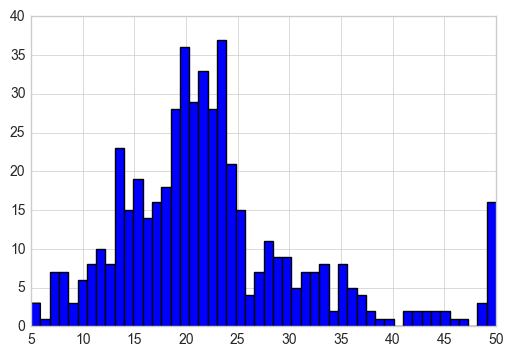

In [6]:
plt.hist(boston.target, bins=50) ## bins - how many barsplt

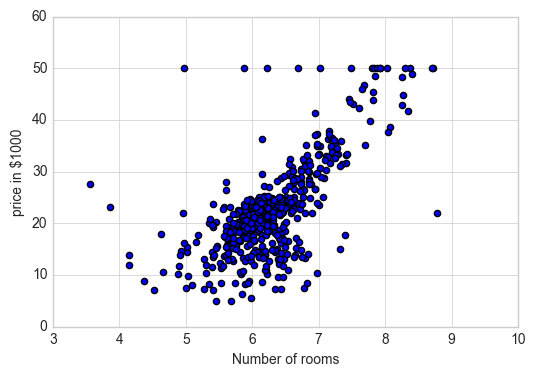

In [7]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('price in $1000')
plt.xlabel('Number of rooms')

In [8]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target

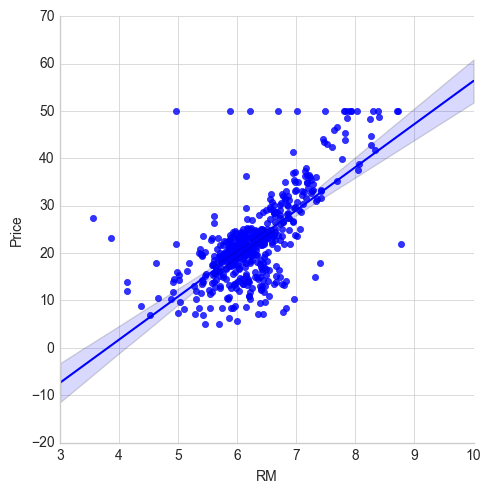

In [10]:
sns.lmplot('RM','Price',data=boston_df)

In [13]:
# single value regression
X = boston_df.RM
X = np.vstack(boston_df.RM)
X = np.array([ [value,1] for value in X])
Y = boston_df['Price']
m, b = np.linalg.lstsq(X,Y)[0]

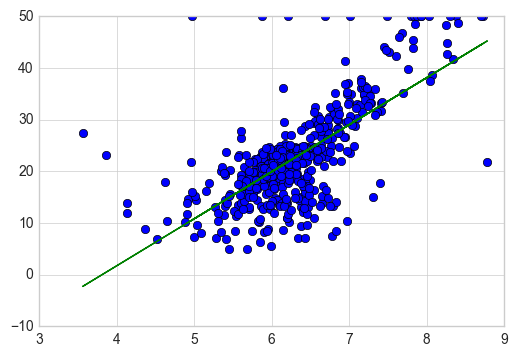

In [14]:
Y = boston_df['Price']
plt.plot(boston_df.RM, boston_df.Price, 'o')
x = boston_df.RM
plt.plot(x,m*x + b, label = 'Best Fit Line')

In [15]:
## root mean square error 
result = np.linalg.lstsq(X,Y)
error_total = result[1]
rmse = np.sqrt(error_total/len(X))
rmse

array([ 6.60307139])

In [16]:
# mutiple value regression
import sklearn 
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [17]:
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

In [18]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lreg.intercept_

36.491103280363077

In [20]:
lreg.coef_

array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
         2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
         7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
        -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
        -5.25466633e-01])

In [21]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient est'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient est
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [23]:
### Training and testing
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, boston_df.Price)

/home/user/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
lreg = LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [29]:
print (" Fit a model X_train, and calculate the MSE with Y_train: %.2f " % np.mean((Y_train-pred_train)**2))

print (" Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f " % np.mean((Y_test - pred_test)**2))

 Fit a model X_train, and calculate the MSE with Y_train: 45.02 
 Fit a model X_train, and calculate MSE with X_test and Y_test: 39.39 


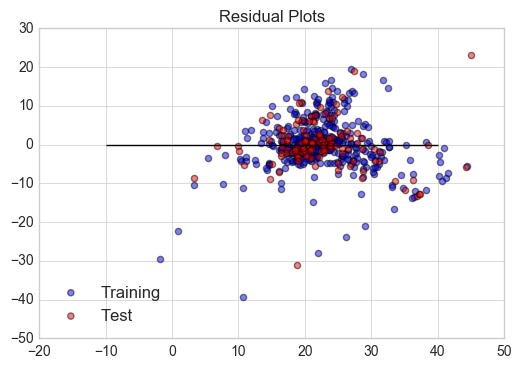

In [30]:
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40)

plt.legend((train,test),('Training','Test'),loc='lower left')

plt.title('Residual Plots')